# Attempting to merge Golden Globes data with our datasets

In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
title_basics=read.delim("./../dataset/filtered.title.basics.tsv",header=TRUE)

In [143]:
golden_globes = read.csv("./../dataset/golden_globe_awards.csv",header=TRUE) 

In [144]:
head(title_basics)

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,1,Short


In [145]:
head(golden_globes)

year_film,year_award,ceremony,category,nominee,film,win
1943,1944,1,Best Performance by an Actress in a Supporting Role in any Motion Picture,Katina Paxinou,For Whom The Bell Tolls,True
1943,1944,1,Best Performance by an Actor in a Supporting Role in any Motion Picture,Akim Tamiroff,For Whom The Bell Tolls,True
1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
1943,1944,1,Picture,The Song Of Bernadette,,True
1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True
1943,1944,1,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,True


In [146]:
summary(golden_globes)

   year_film      year_award      ceremony    
 Min.   :1943   Min.   :1944   Min.   : 1.00  
 1st Qu.:1972   1st Qu.:1973   1st Qu.:30.00  
 Median :1988   Median :1989   Median :46.00  
 Mean   :1987   Mean   :1988   Mean   :45.49  
 3rd Qu.:2004   3rd Qu.:2005   3rd Qu.:62.00  
 Max.   :2019   Max.   :2020   Max.   :77.00  
                                              
                                                                      category   
 Best Performance by an Actress in a Supporting Role in any Motion Picture: 360  
 Best Director - Motion Picture                                           : 357  
 Best Performance by an Actor in a Supporting Role in any Motion Picture  : 352  
 Best Motion Picture - Drama                                              : 351  
 Best Performance by an Actor in a Motion Picture - Drama                 : 344  
 Best Performance by an Actor in a Motion Picture - Musical or Comedy     : 342  
 (Other)                                          

In [147]:
golden_globes$ceremony=NULL

In [148]:
golden_globes$win = as.integer(as.logical(golden_globes$win))
unique(golden_globes$win)

[1] 1 0

In [149]:
colnames(golden_globes) = c("startYear","cerimonyYear","category","nominee","film","win")

In [150]:
head(golden_globes)

startYear,cerimonyYear,category,nominee,film,win
1943,1944,Best Performance by an Actress in a Supporting Role in any Motion Picture,Katina Paxinou,For Whom The Bell Tolls,1
1943,1944,Best Performance by an Actor in a Supporting Role in any Motion Picture,Akim Tamiroff,For Whom The Bell Tolls,1
1943,1944,Best Director - Motion Picture,Henry King,The Song Of Bernadette,1
1943,1944,Picture,The Song Of Bernadette,,1
1943,1944,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,1
1943,1944,Actor In A Leading Role,Paul Lukas,Watch On The Rhine,1


## How many of the awards are for people instead of films itself?

In [151]:
person_p = 1 - nrow(golden_globes[golden_globes$film=="",])/nrow(golden_globes)
film_p =  nrow(golden_globes[golden_globes$film=="",])/nrow(golden_globes)

In [152]:
person_p = round(person_p,digits=2)
film_p =  round(film_p,digits=2)

In [153]:
pie_chart_data = data.frame(group=c("Film","People"),value=c(film_p,person_p))

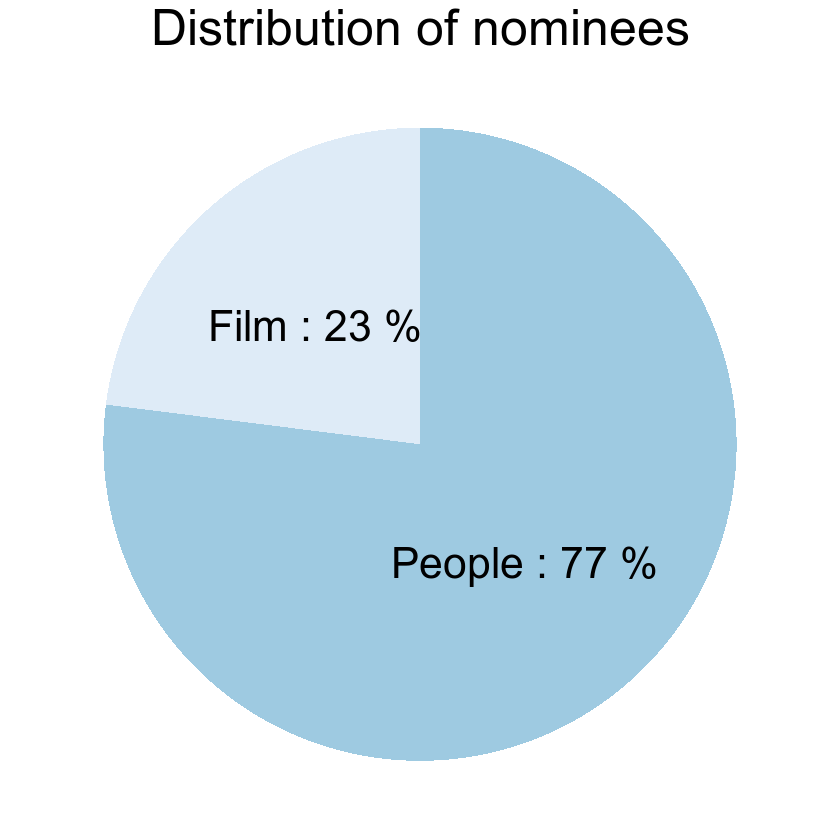

In [154]:
ggplot(pie_chart_data, aes(x="", y=value, fill=group)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) + 
  theme_void()+
  theme(legend.position="none",plot.title=element_text(hjust=0.5,size=30)) +
  geom_text(aes(label = paste(group,":", value*100,"%")), position=position_stack(vjust=0.5), color = "black", size=9) + 
  scale_fill_brewer(palette="Blues") +
  labs(title="Distribution of nominees")

## merge

In [155]:
title_basics$endYear=NULL

In [156]:
summary(as.factor(golden_globes$win))

0    1 
6166 1825

In [157]:
golden_films = golden_globes

In [158]:
colnames(golden_films) = c("startYear","cerimonyYear","category","primaryTitle","film","win")

In [159]:
merging = merge(title_basics,golden_films,by=c("primaryTitle","startYear"))

In [160]:
head(merging)

primaryTitle,startYear,tconst,titleType,originalTitle,isAdult,runtimeMinutes,genres,cerimonyYear,category,film,win
10,1979,tt0078721,movie,10,0,122,"Comedy,Romance",1980,Best Motion Picture - Musical or Comedy,,0
12 Years a Slave,2013,tt2024544,movie,12 Years a Slave,0,134,"Biography,Drama,History",2014,Best Motion Picture - Drama,,1
1776,1972,tt0068156,movie,1776,0,141,"Drama,Family,History",1973,Best Motion Picture - Musical or Comedy,,0
1917,2019,tt8579674,movie,1917,0,119,"Drama,War",2020,Best Motion Picture - Drama,,1
20th Century Women,2016,tt4385888,movie,20th Century Women,0,119,"Comedy,Drama",2017,Best Motion Picture - Musical or Comedy,,0
24,2001,tt0270179,movie,24,0,78,Drama,2002,Best Television Series - Drama,,0


In [161]:
summary(as.factor(merging$win))

0   1 
716 200